# LIGO Chirp data extraction

1. Download [this file](http://bit.ly/20VOiVH)
2. Convert it to flac by saying `avconv -i LIGO\ Chirp-1080p.m4v LIGO\ Chirp-1080p.flac`
3. Run the rest of this notebook

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


In [2]:
from IPython.display import Audio

In [3]:
y, sr = librosa.load('LIGO Chirp-1080p.flac', sr=None, mono=False)

In [4]:
y.shape, sr

((2, 575488), 48000)

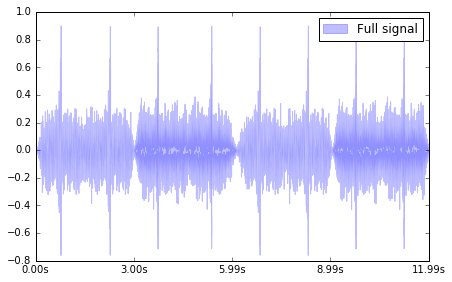

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
librosa.display.waveplot(y, sr=sr, alpha=0.25, label='Full signal')
plt.legend(loc='best')
plt.tight_layout()

In [6]:
# It looks like there's some leading zeros that we should get rid of

# Find the first non-zero
idx = np.argmax(np.abs(y).sum(axis=0) > 0) - 1

In [7]:
# Check that y.shape[1] - idx  is a multiple of 4
print(idx, (y.shape[1] - idx) % 4)

1992 0


In [8]:
# Trim off the leading silence
y = y[:, idx:]

In [9]:
# The whole signal is played four times
n = y.shape[1] // 4

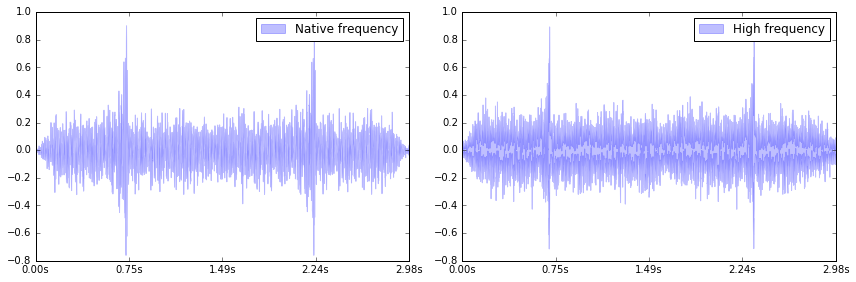

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
librosa.display.waveplot(y[:, :n], sr=sr, alpha=0.25, label='Native frequency')
plt.legend(loc='best')
plt.subplot(1,2,2)
librosa.display.waveplot(y[:, n:2*n], sr=sr, alpha=0.25, label='High frequency')
plt.legend(loc='best')
plt.tight_layout()

In [11]:
Audio(data=y[:, :n], rate=sr)

In [12]:
Audio(data=y[:, n:2*n], rate=sr)

In [13]:
# And write it out to disk
librosa.output.write_wav('ligo_chirps_raw.wav', y[:, :n], sr, norm=False)